<a href="https://colab.research.google.com/github/Kushagra3219/SNA/blob/main/Page_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 --------------    Ranked Centrality Table    --------------

 --------------    Rank Correlation with PageRank    -------------- 

Correlation Between Degree and PageRank: 0.9419
Correlation Between Betweenness and PageRank: 0.8417
Correlation Between Closeness and PageRank: 0.7373
Correlation Between Eigenvector and PageRank: 0.6141

 --------------    Summary Table    -------------- 


,Measure,Spearman_Correlation_with_PageRank
0,Degree,0.941868
1,Betweenness,0.841733
2,Closeness,0.737252
3,Eigenvector,0.614067


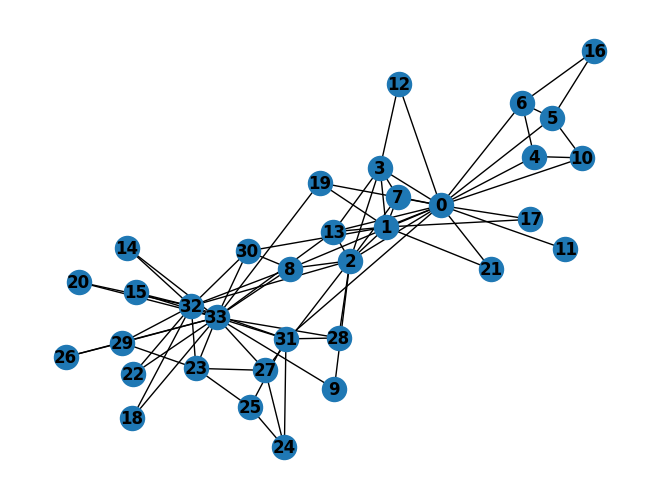

In [1]:
# 4. Compute different centrality measures to identify top-N nodes and compute rank
# correlation coefficient with the ranks obtained by PageRank method.


import networkx as nx
import pandas as pd
from scipy.stats import spearmanr, kendalltau
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, font_weight='bold')
degree_centrality = nx.degree_centrality(G)
degree_centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvector_centrality
pagerank = nx.pagerank(G)
pagerank
nodes = G.nodes()
nodes
loc = list(zip(
   nodes,
   list(degree_centrality.values()),
   list(closeness_centrality.values()),
   list(betweenness_centrality.values()),
   list(pagerank.values()),
   list(eigenvector_centrality.values())
))
df = pd.DataFrame(loc, columns=['Nodes', 'Degree', 'Closeness', 'Betweenness', 'PageRank', 'Eigenvector'])
df
df['DC_RANK'] = df['Degree'].rank(ascending=False)
df['CC_RANK'] = df['Closeness'].rank(ascending=False)
df['BC_RANK'] = df['Betweenness'].rank(ascending=False)
df['PR_RANK'] = df['PageRank'].rank(ascending=False)
df['EC_RANK'] = df['Eigenvector'].rank(ascending=False)
df
df_sorted = df.sort_values(by=['PR_RANK'])
print(" --------------    Ranked Centrality Table    --------------")
df_sorted
Corr_DC = df['PR_RANK'].corr(df['DC_RANK'])
Corr_BC = df['PR_RANK'].corr(df['BC_RANK'])
Corr_CC = df['PR_RANK'].corr(df['CC_RANK'])
Corr_EC = df['PR_RANK'].corr(df['EC_RANK'])
print("\n --------------    Rank Correlation with PageRank    -------------- \n")
print(f"Correlation Between Degree and PageRank: {Corr_DC:.4f}")
print(f"Correlation Between Betweenness and PageRank: {Corr_BC:.4f}")
print(f"Correlation Between Closeness and PageRank: {Corr_CC:.4f}")
print(f"Correlation Between Eigenvector and PageRank: {Corr_EC:.4f}")
corr_df = pd.DataFrame({
   'Measure': ['Degree', 'Betweenness', 'Closeness', 'Eigenvector'],
   'Spearman_Correlation_with_PageRank': [Corr_DC, Corr_BC, Corr_CC, Corr_EC]
})
print("\n --------------    Summary Table    -------------- ")
corr_df.sort_values(by='Spearman_Correlation_with_PageRank', ascending=False)